# BOSTON CRIMES

### By: Ashley Shell

#### Set Up

In [11]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
#profile = crimes.profile_report(title='Boston Crimes Profiling')
#profile.to_file(output_file='boston-crimes-profiling.html')
crimes = pd.read_csv('crime.csv')

#### Print Data Frame

In [12]:
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,2018-08-21 0:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


# Answer Basic Questions

#### What is the range of dates being reported?

In [4]:
crimes.OCCURRED_ON_DATE = pd.to_datetime(crimes.OCCURRED_ON_DATE)
crimes.OCCURRED_ON_DATE

0        2018-09-02 13:00:00
1        2018-08-21 00:00:00
2        2018-09-03 19:27:00
3        2018-09-03 21:16:00
4        2018-09-03 21:05:00
                 ...        
319068   2016-06-05 17:25:00
319069   2015-07-09 13:38:00
319070   2015-07-09 13:38:00
319071   2016-05-31 19:35:00
319072   2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 319073, dtype: datetime64[ns]

#### What are all the unique groups of offense codes and which are most prevalent in the data?

In [5]:
countOCG = crimes.groupby('OFFENSE_CODE_GROUP').OFFENSE_CODE_GROUP.count()
countOCG.sort_values()

OFFENSE_CODE_GROUP
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Biological Threat                                2
INVESTIGATE PERSON                               4
HUMAN TRAFFICKING                                7
                                             ...  
Other                                        18075
Investigate Person                           18750
Medical Assistance                           23540
Larceny                                      25935
Motor Vehicle Accident Response              37132
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

# Answer these questions (and produce appropriate accompanying visualizations)

#### What percentage of murders involved a shooting?
##### Cell below is cleaning up the SHOOTING data and converting it into Trues and Falses

In [89]:
crimes['SHOOTING'] = crimes['SHOOTING'].fillna(0)
crimes.SHOOTING = crimes.SHOOTING.replace({'Y': 1})
crimes['SHOOTING'] = crimes['SHOOTING'].astype('bool')
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,False,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,False,2018-08-21 0:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,False,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,False,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,False,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,False,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,False,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [14]:
crimes.SHOOTING.value_counts()

0    318054
1      1019
Name: SHOOTING, dtype: int64

#### Then I created a variable called murder and assigned it to locate all the crimes that had the offense code of 111 (murder)
#### After that I made a groupby to count the SHOOTING column
#### Then I made the pie chart using matplotlib. I added the accesories of color, expload, shadow, and size.

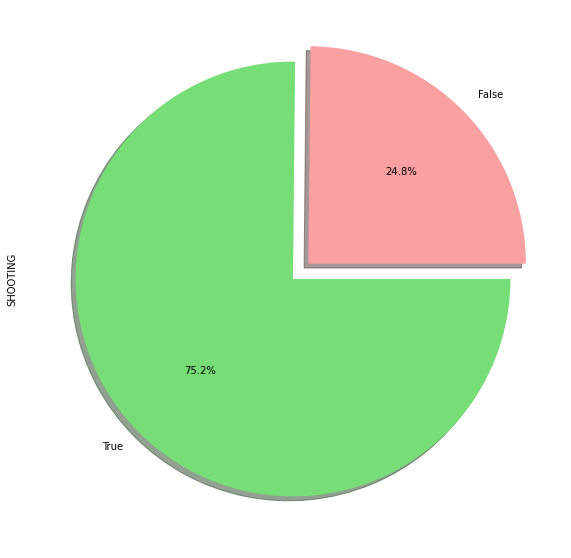

In [90]:
murder = crimes.loc[crimes.OFFENSE_CODE == 111]
counting = murder.groupby('SHOOTING').SHOOTING.count()
explode = (0.1, 0) 
colors = ('#FAA0A0', '#77DD77')
plot = counting.plot.pie(y='counting', figsize=(10, 10),autopct='%1.1f%%', shadow = True, explode= explode, colors=colors)

#### Sources

In [ ]:
#http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php

In [ ]:
#https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe

In [ ]:
#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

# Are there certain times of the year when crime is more prevalent in Boston?

#### In the cell below I started by creating a new column called DATE and asigned it the dates using datetime

In [44]:
crimes.OCCURRED_ON_DATE = pd.to_datetime(crimes.OCCURRED_ON_DATE)
crimes['DATE'] = crimes.OCCURRED_ON_DATE
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DATE
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,0.0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02 13:00:00
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,0.0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21 00:00:00
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,0.0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03 19:27:00
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,0.0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03 21:16:00
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,0.0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03 21:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,0.0,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05 17:25:00
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,0.0,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09 13:38:00
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,0.0,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09 13:38:00
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,0.0,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",2016-05-31 19:35:00


#### Source

In [ ]:
#https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587

#### Then I made sure the format was consistent for all the data in the DATE column. After that I made another column for year and then realized after that that colun already existed. 

In [52]:
crimes['DATE'] = pd.to_datetime(crimes['DATE'], format="%Y-%d-%m %H:%M:%S")
crimes['year']= crimes['DATE'].dt.year
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DATE,year
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,0.0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02 13:00:00,2018
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,0.0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21 00:00:00,2018
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,0.0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03 19:27:00,2018
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,0.0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03 21:16:00,2018
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,0.0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03 21:05:00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,0.0,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05 17:25:00,2016
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,0.0,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09 13:38:00,2015
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,0.0,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09 13:38:00,2015
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,0.0,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",2016-05-31 19:35:00,2016


#### I then made a couple visuals. I started with a line plot that showed that the later months had more crimes in 2015 but then it was consistent in 2018-2017 and then dropped in 2018

<AxesSubplot:xlabel='year', ylabel='MONTH'>

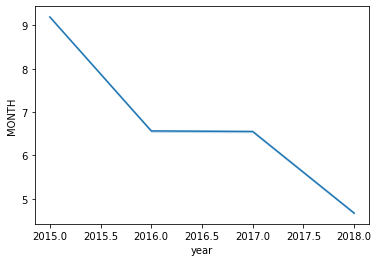

In [54]:
sns.lineplot(x = "year", y = "MONTH", data=crimes)

#### This other line plot shows an increase in the later months for each year

<AxesSubplot:xlabel='MONTH', ylabel='DATE'>

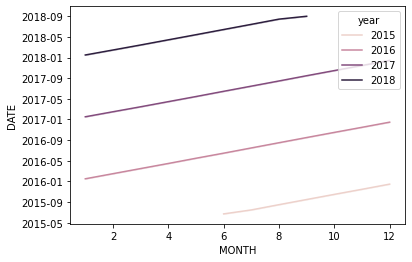

In [55]:
sns.lineplot(data=crimes, x="MONTH", y="DATE", hue="year")

#### This one was a test and I dislike it cause its messy and doesnt make sense.

<AxesSubplot:xlabel='MONTH', ylabel='MONTH'>

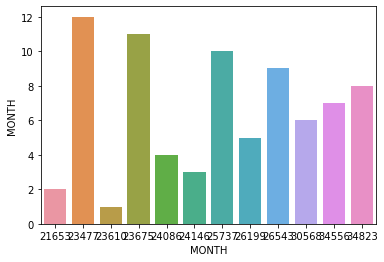

In [92]:
morecrimes = crimes.groupby('MONTH').MONTH.count().to_frame()
sns.barplot(data=morecrimes, x=morecrimes.index, y="MONTH")

# Answer two (or more) unique questions of your own, again using visualizations

## Question 1: During which month is towing most popular?

#### This swarm plot was too busy to be able to tell whcih month was most popular. 

<AxesSubplot:xlabel='MONTH', ylabel='MONTH'>

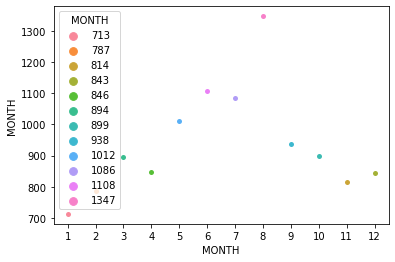

In [29]:
towed = crimes.loc[crimes.OFFENSE_CODE == 3410]
moreinfo = towed.groupby('MONTH').MONTH.count().to_frame()
moreinfo
sns.swarmplot(data=moreinfo, x=moreinfo.index, y="MONTH", hue="MONTH")

#### So I switched to a bar plot and changed the DAY_OF_WEEK to HOUR. Now you can see which months had the highest amount of towing during which months and which hour. 

<AxesSubplot:xlabel='MONTH', ylabel='MONTH'>

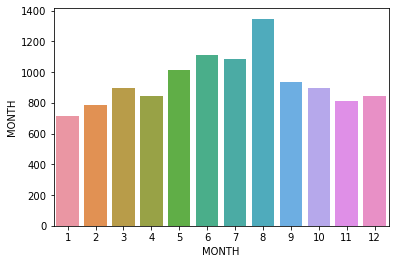

In [19]:

sns.barplot(data=moreinfo, x=moreinfo.index, y="MONTH")

## Using the offense codes 1402,111,3410,3125, 619  create a lineplot that shows the trend line throughout the months

#### This plot below shows all the crimes of 1402,111,3410,3125, 619 trend line on monday throughout the months

<AxesSubplot:xlabel='OFFENSE_CODE_GROUP', ylabel='OFFENSE_CODE_GROUP'>

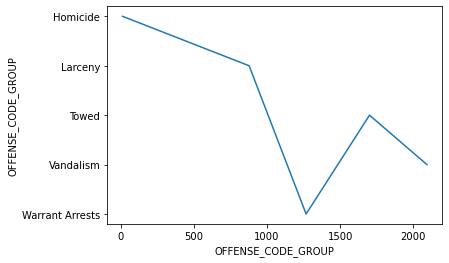

In [65]:
alls = crimes.loc[crimes.OFFENSE_CODE.isin([1402, 111, 3410, 3125,619])]
monday = alls.loc[crimes.DAY_OF_WEEK == 'Monday']
other = monday.groupby('OFFENSE_CODE_GROUP').OFFENSE_CODE_GROUP.count().to_frame()
sns.lineplot(data=other, x="OFFENSE_CODE_GROUP", y=other.index)

#### More Testing

<AxesSubplot:xlabel='MONTH', ylabel='DAY_OF_WEEK'>

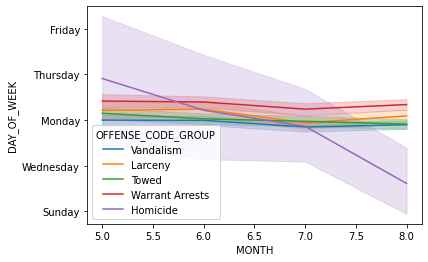

In [87]:
mother = crimes.loc[crimes.OFFENSE_CODE.isin([1402, 111, 3410, 3125,619])]
monthsss = mother.loc[crimes.MONTH.isin ([5,6,7,8])]
otherss = monthsss.groupby('OFFENSE_CODE_GROUP').OFFENSE_CODE_GROUP.count().to_frame()

sns.lineplot(data=monthsss, x="MONTH", y ="DAY_OF_WEEK" , hue ="OFFENSE_CODE_GROUP" )

## Which day of the week has the highest amount of vandelism

#### The graph below showed me how often vandalism occured during the days of the week. Sunday and Saturday has the highest percentage of vandelism occur.

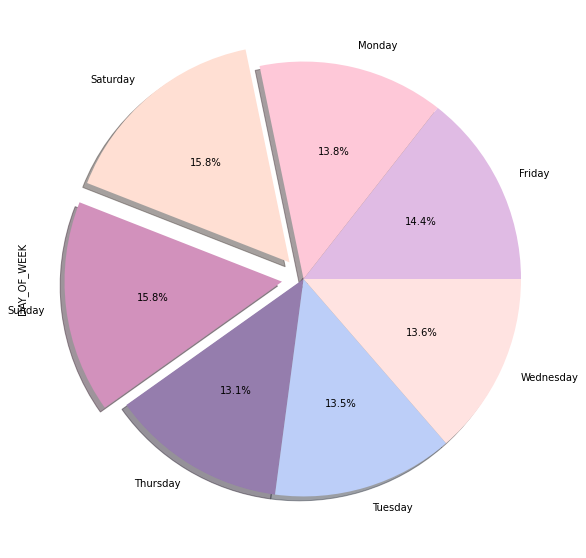

In [88]:
vandalism = crimes.loc[crimes.OFFENSE_CODE == 1402]
howmany = vandalism.groupby('DAY_OF_WEEK').DAY_OF_WEEK.count()
explode = explode = (0, 0, 0.1, 0.1, 0, 0, 0)
color = colors = ('#E0BBE4', '#FEC8D8', '#FFDFD3', '#D291BC', '#957DAD', '#BCCEF8', "#FFE3E1")
moreplot = howmany.plot.pie(y='vandalism', figsize=(10, 10), autopct='%1.1f%%', shadow = True, explode= explode, colors=colors)


## Which part of the year was crime most common

<AxesSubplot:xlabel='YEAR', ylabel='MONTH'>

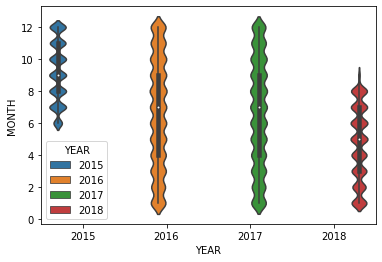

In [100]:
sns.violinplot(y = crimes['MONTH'], x = crimes['YEAR'], hue= crimes['YEAR'], figsize=(20, 20))

In [ ]:
#https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7

## Extra graphs that were just curiosity. They also take forever to load

#### These plots were me just playing around with the different types of plots

In [83]:
sns.pairplot(crimes)


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fa596c55670> (for post_execute):



KeyboardInterrupt



In [103]:
sns.FacetGrid( col = 'DAY_OF_WEEK', row = 'HOUR', data = crimes)


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fa596c55670> (for post_execute):


KeyboardInterrupt: 

In [ ]:
##https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7

# The End!